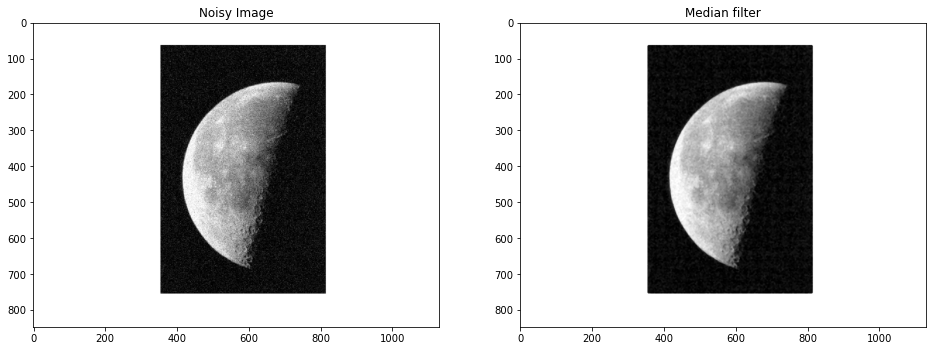

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = plt.imread('Fig3noisymoon.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(img,5)
plt.figure(figsize=(16, 16))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Noisy Image')
plt.subplot(122),
plt.imshow(median,cmap = 'gray')
plt.title('Median filter')
plt.show()

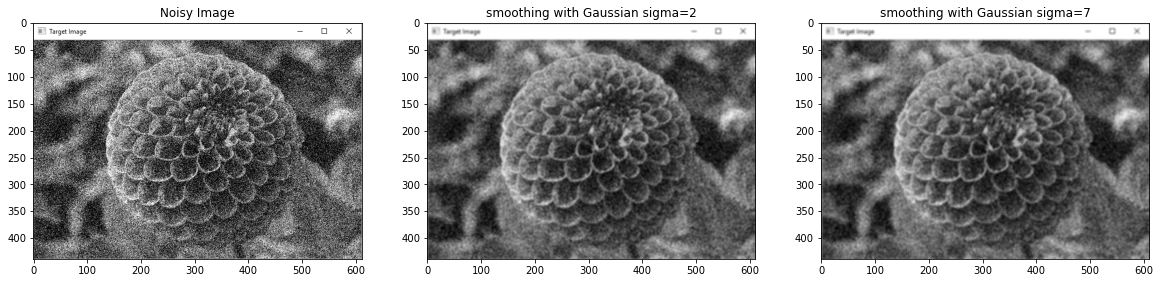

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img2 = plt.imread('noisy-grayscale.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kernel1 = np.ones((5,5),np.float32)/25
kernel2 = np.ones((11,11),np.float32)/121

I_avg_smooth1 = cv2.filter2D(img2,-1,kernel1)
I_avg_smooth2 = cv2.filter2D(img2,-1,kernel2)

I_gaussian_blur1 = cv2.GaussianBlur(img2,(5,5),2,cv2.BORDER_DEFAULT)
I_gaussian_blur2 = cv2.GaussianBlur(img2,(5,5),7,cv2.BORDER_DEFAULT)

plt.figure(figsize=(20, 20))
plt.subplot(1,3,1),plt.imshow(img2,cmap = 'gray')
plt.title('Noisy Image')

plt.subplot(1,3,2),
plt.imshow(I_gaussian_blur1,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=2')

plt.subplot(1,3,3),
plt.imshow(I_gaussian_blur2,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=7')

plt.show()


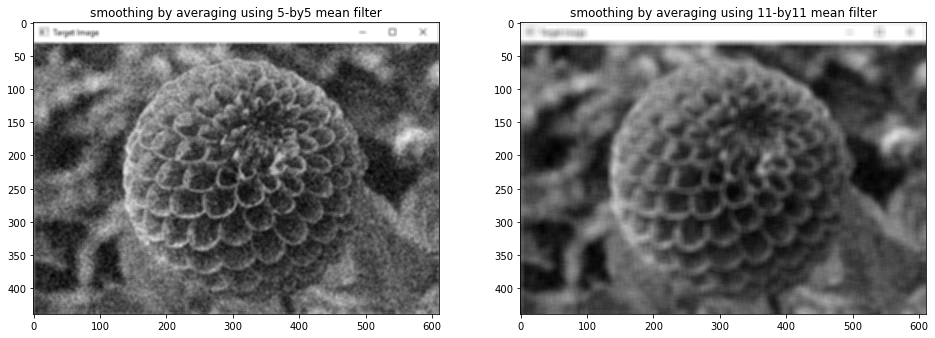

In [3]:
plt.figure(figsize=(16, 16))

plt.subplot(1,2,1),
plt.imshow(I_avg_smooth1,cmap = 'gray')
plt.title('smoothing by averaging using 5-by5 mean filter')

plt.subplot(1,2,2),
plt.imshow(I_avg_smooth2,cmap = 'gray')
plt.title('smoothing by averaging using 11-by11 mean filter')
plt.show()


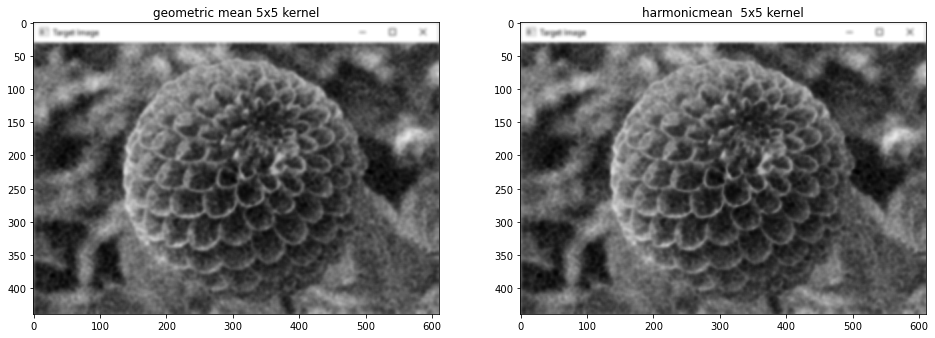

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img3=I_avg_smooth1;
rows, cols = img3.shape[:2]
ksize = 5

padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(img3, *[padsize]*4, cv2.BORDER_DEFAULT)
geomean1 = np.zeros_like(img3)
for r in range(rows):
    for c in range(cols):
        geomean1[r, c] = np.prod(pad_img[r:r+ksize, c:c+ksize])**(1/(ksize**2))



harmonicmean = np.zeros_like(img3)
for r in range(rows):
    for c in range(cols):
        harmonicmean[r, c] = 1/np.sum(1/pad_img[r:r+ksize, c:c+ksize])
harmonicmean = harmonicmean*ksize**2

plt.figure(figsize=(16, 16))

plt.subplot(1,2,1),

plt.imshow(geomean1, cmap='gray')
plt.title('geometric mean 5x5 kernel')

plt.subplot(1,2,2),

plt.imshow(harmonicmean, cmap='gray')
plt.title('harmonicmean  5x5 kernel')
plt.show()


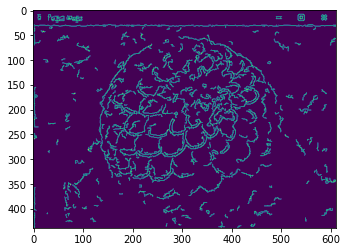

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
imgl = plt.imread('noisy-grayscale.png')
imgl = cv2.cvtColor(imgl, cv2.COLOR_BGR2GRAY)

imgl=(imgl*255).astype(np.uint8)

I_gaussian_blur1 = cv2.GaussianBlur(imgl,(5,5),3,cv2.BORDER_DEFAULT)
Gb1 = np.uint8(I_gaussian_blur1)
cannyedges = cv2.Canny(Gb1,100,200)
plt.imshow(cannyedges)


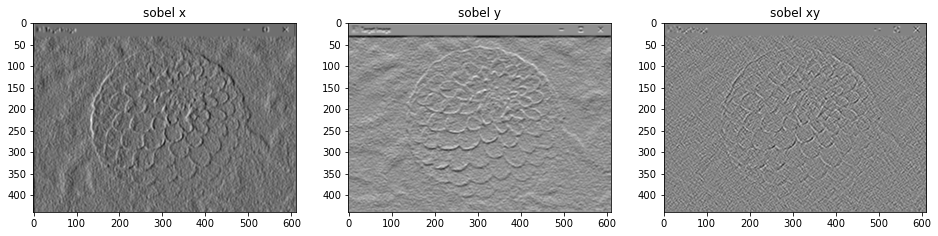

In [6]:
# Sobel Edge Detection

sobelx = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis

sobely = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X and Y Sobel Edge Detection

plt.figure(figsize=(16, 16))

plt.subplot(1,3,1),
plt.imshow(sobelx,cmap = 'gray')
plt.title('sobel x')

plt.subplot(1,3,2),
plt.imshow(sobely,cmap = 'gray')
plt.title('sobel y')


plt.subplot(1,3,3),
plt.imshow(sobelxy,cmap = 'gray')
plt.title('sobel xy')
plt.show()

# Use the x & direction to compute the image orientation


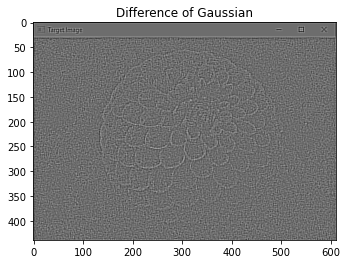

In [7]:
I_gaussian_blur1 = cv2.GaussianBlur(img2,(5,5),3,cv2.BORDER_DEFAULT)
I_gaussian_blur2 = cv2.GaussianBlur(img2,(5,5),7,cv2.BORDER_DEFAULT)

DOG=I_gaussian_blur1-I_gaussian_blur2
plt.imshow(DOG,cmap='gray')
plt.title('Difference of Gaussian')
plt.show()

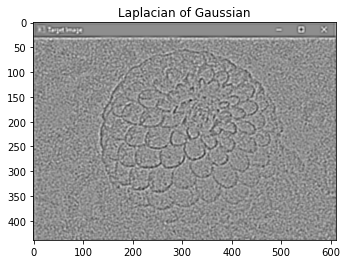

In [8]:
ksize=7
lapedges = cv2.Laplacian(I_gaussian_blur1, cv2.CV_64F, ksize=ksize) 

plt.imshow(lapedges,cmap='gray')
plt.title('Laplacian of Gaussian')
plt.show()

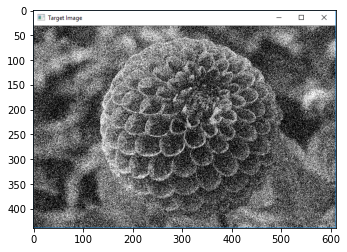

In [9]:
img3 = plt.imread('noisy-grayscale.png')
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.imshow(img3)

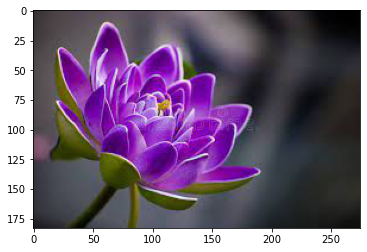

In [10]:
pic1 = plt.imread('download.jpg')
plt.imshow(pic1)

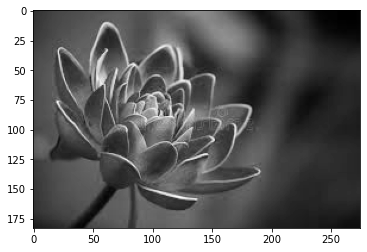

In [11]:
img = cv2.cvtColor(pic1, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')

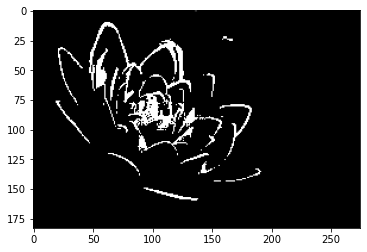

In [12]:
ret, thresh1 = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap='gray')

In [13]:
se = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

Text(0.5, 1.0, 'Dilation')

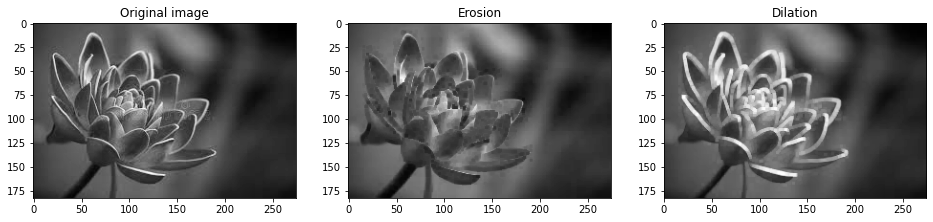

In [14]:
#Erosion, Dilation
se = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
im1_erosion = cv2.erode(img, se, iterations=1)
im1_dilate = cv2.dilate(img, se, iterations=1)
plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title('Original image')
plt.subplot(1,3,2)
plt.imshow(im1_erosion,cmap = 'gray')
plt.title('Erosion')
plt.subplot(1,3,3)
plt.imshow(im1_dilate,cmap = 'gray')
plt.title('Dilation')

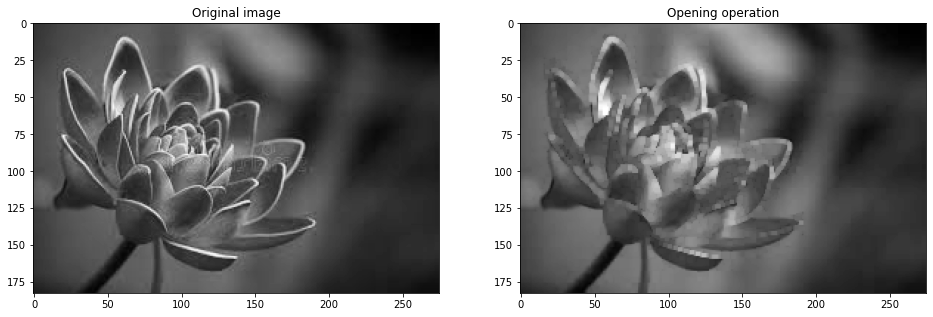

In [15]:
#opening operation
im1_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, se)
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original image')
plt.subplot(1,2,2)
plt.title('Opening operation')
plt.imshow(im1_open,cmap='gray')

Text(0.5, 1.0, 'Closing operation')

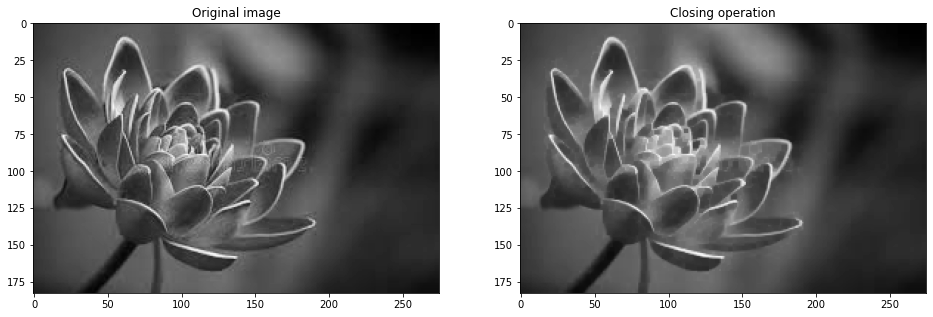

In [16]:
#closing operation
im1_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se)
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(im1_close,cmap = 'gray')
plt.title('Closing operation')

Text(0.5, 1.0, 'Image boundary detection')

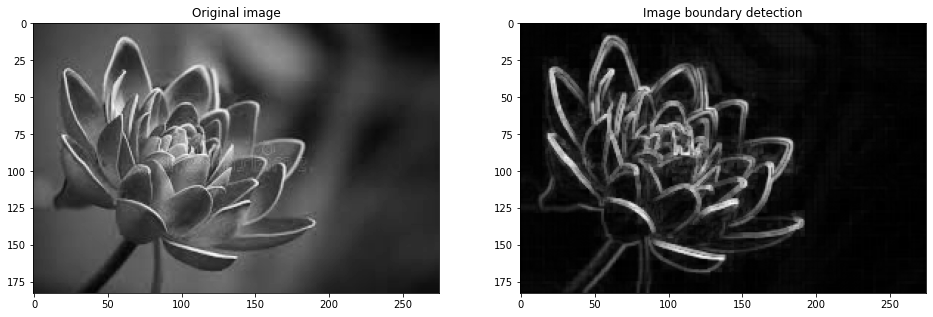

In [17]:
#gradient operation/boundary extraction
im1_boundary = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, se)
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(im1_boundary,cmap = 'gray')
plt.title('Image boundary detection')

Text(0.5, 1.0, 'Hole-filled image')

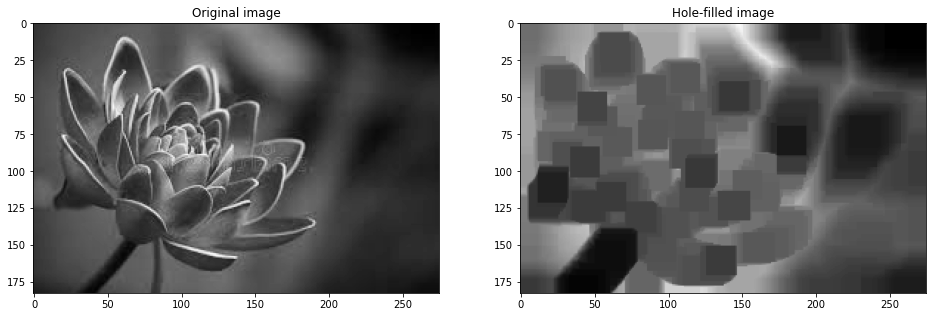

In [38]:
# Hole filling
rect=cv2.getStructuringElement(cv2.MORPH_RECT,(20,20))
im1_hf = cv2.morphologyEx(img, cv2.MORPH_RECT, rect)
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(im1_hf,cmap = 'gray')
plt.title('Hole-filled image')

Text(0.5, 1.0, 'Hole-filled image')

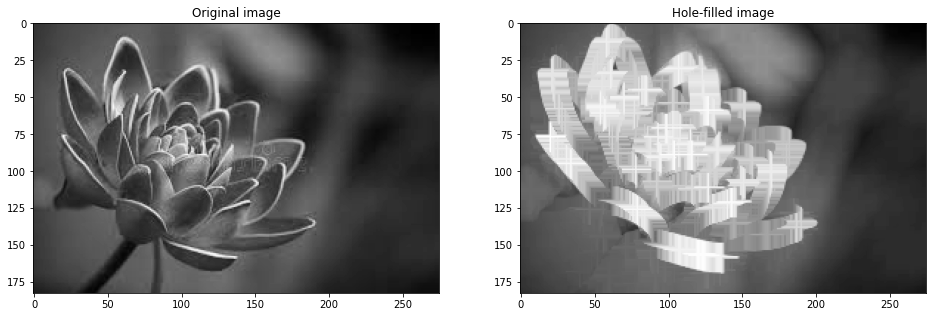

In [19]:
# Hole filling
cross=cv2.getStructuringElement(cv2.MORPH_CROSS,(20,20))
im1_hf = cv2.morphologyEx(img, cv2.MORPH_CROSS, cross)
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(im1_hf,cmap = 'gray')
plt.title('Hole-filled image')

Text(0.5, 1.0, 'Hole-filled image')

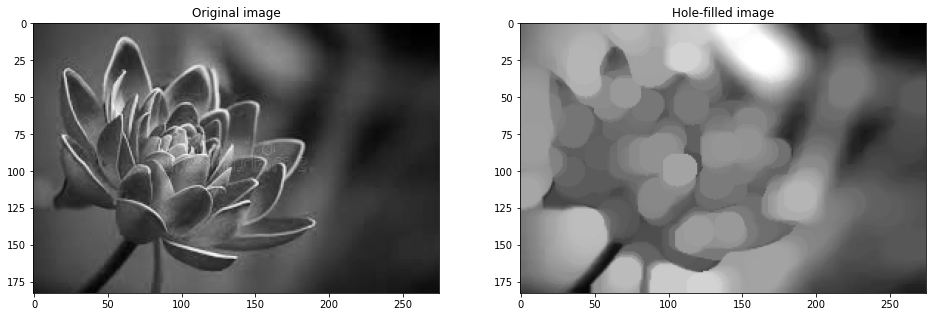

In [20]:
# Hole filling
elp=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
im1_hf = cv2.morphologyEx(img, cv2.MORPH_ELLIPSE, elp)
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(im1_hf,cmap = 'gray')
plt.title('Hole-filled image')

In [21]:
# Connected Components Labelling
se = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
im1_dilate = cv2.dilate(img, se, iterations=1)
connectivity=4
output=cv2.connectedComponentsWithStats(im1_dilate,connectivity)
num_labels=output[0]
labels=output[1]
stats=output[2]
centroids=output[3]
print(num_labels)


2


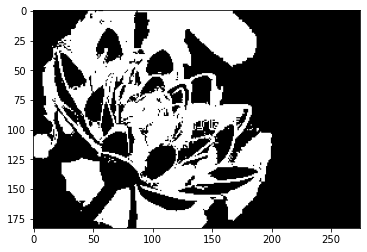

In [22]:
# Create binary image from source image
_, bw = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(bw,cmap='gray')

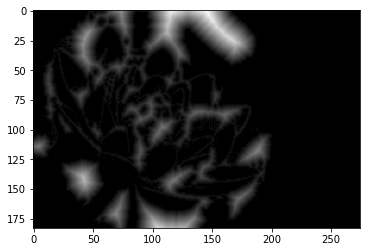

In [23]:
#Distance transform
dist = cv2.distanceTransform(bw, cv2.DIST_L2, 3)
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
plt.imshow(dist,cmap='gray')

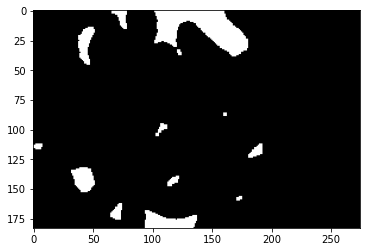

In [24]:
_, dist = cv2.threshold(dist, 0.4, 1.0, cv2.THRESH_BINARY)
# Dilate a bit the dist image
kernel1 = np.ones((3,3), dtype=np.uint8)
dist = cv2.dilate(dist, kernel1)
plt.imshow(dist,cmap='gray')

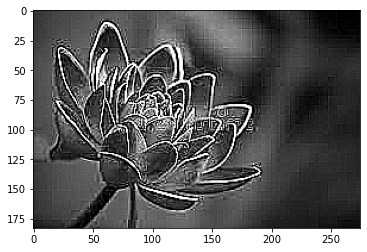

In [25]:
#Laplacian filtered image
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float32)
imgLaplacian = cv2.filter2D(img, cv2.CV_32F, kernel)
sharp = np.float32(img)
imgResult = sharp - imgLaplacian
# convert back to 8bits gray scale
imgResult = np.clip(imgResult, 0, 255)
imgResult = imgResult.astype('uint8')
imgLaplacian = np.clip(imgLaplacian, 0, 255)
imgLaplacian = np.uint8(imgLaplacian)
#cv.imshow('Laplace Filtered Image', imgLaplacian)
plt.imshow(imgResult,cmap='gray')

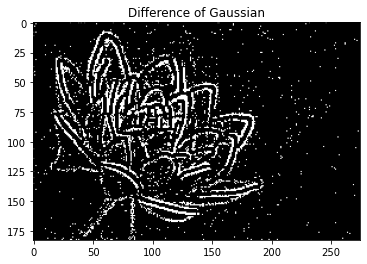

In [26]:
#Difference of Gaussian
I_gaussian_blur1 = cv2.GaussianBlur(img,(5,5),3,cv2.BORDER_DEFAULT)
I_gaussian_blur2 = cv2.GaussianBlur(img,(5,5),7,cv2.BORDER_DEFAULT)
DOG=I_gaussian_blur1-I_gaussian_blur2
plt.imshow(DOG,cmap='gray')
plt.title('Difference of Gaussian')
plt.show()

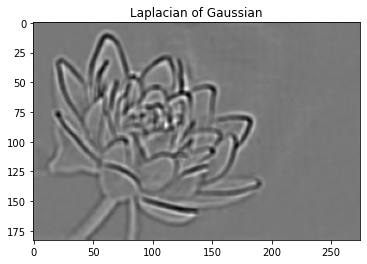

In [27]:
#Laplacian of gaussian
ksize=7
lapedges = cv2.Laplacian(I_gaussian_blur1, cv2.CV_64F, ksize=ksize) 
plt.imshow(lapedges,cmap='gray')
plt.title('Laplacian of Gaussian')
plt.show()

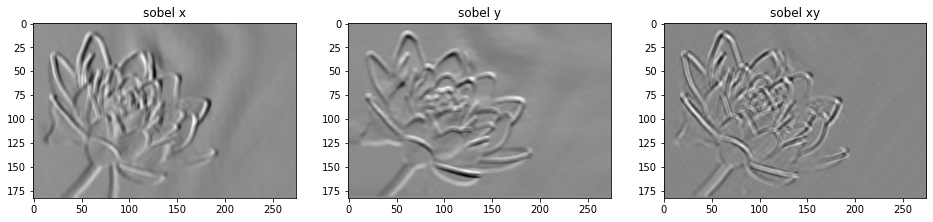

In [28]:
# Sobel Edge Detection

sobelx = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis

sobely = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X and Y Sobel Edge Detection

plt.figure(figsize=(16, 16))

plt.subplot(1,3,1),
plt.imshow(sobelx,cmap = 'gray')
plt.title('sobel x')

plt.subplot(1,3,2),
plt.imshow(sobely,cmap = 'gray')
plt.title('sobel y')


plt.subplot(1,3,3),
plt.imshow(sobelxy,cmap = 'gray')
plt.title('sobel xy')
plt.show()

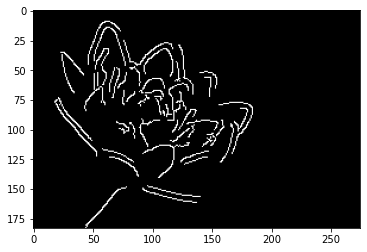

In [29]:
#Canny edge detection
I_gaussian_blur1 = cv2.GaussianBlur(img,(5,5),3,cv2.BORDER_DEFAULT)
Gb1 = np.uint8(I_gaussian_blur1)
cannyedges = cv2.Canny(Gb1,100,200)
plt.imshow(cannyedges,cmap='gray')

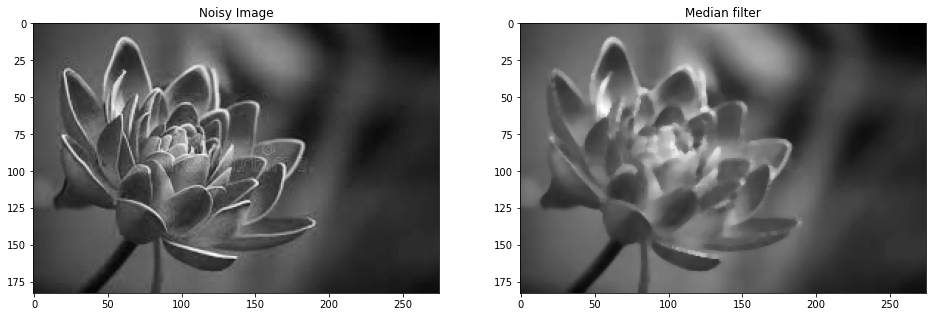

In [30]:
#Median filter
median = cv2.medianBlur(img,5)
plt.figure(figsize=(16, 16))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Noisy Image')
plt.subplot(122),
plt.imshow(median,cmap = 'gray')
plt.title('Median filter')
plt.show()

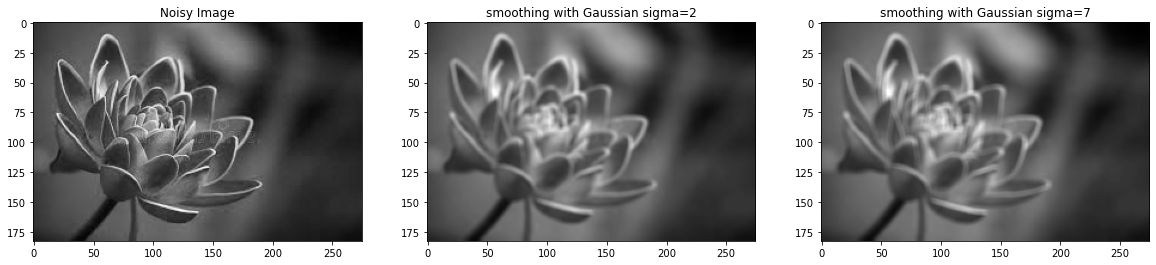

In [31]:
# Geometric and harmonic mean filter
kernel1 = np.ones((5,5),np.float32)/25
kernel2 = np.ones((11,11),np.float32)/121

I_avg_smooth1 = cv2.filter2D(img,-1,kernel1)
I_avg_smooth2 = cv2.filter2D(img,-1,kernel2)

I_gaussian_blur1 = cv2.GaussianBlur(img,(5,5),2,cv2.BORDER_DEFAULT)
I_gaussian_blur2 = cv2.GaussianBlur(img,(5,5),7,cv2.BORDER_DEFAULT)

plt.figure(figsize=(20, 20))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Noisy Image')

plt.subplot(1,3,2),
plt.imshow(I_gaussian_blur1,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=2')

plt.subplot(1,3,3),
plt.imshow(I_gaussian_blur2,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=7')

plt.show()


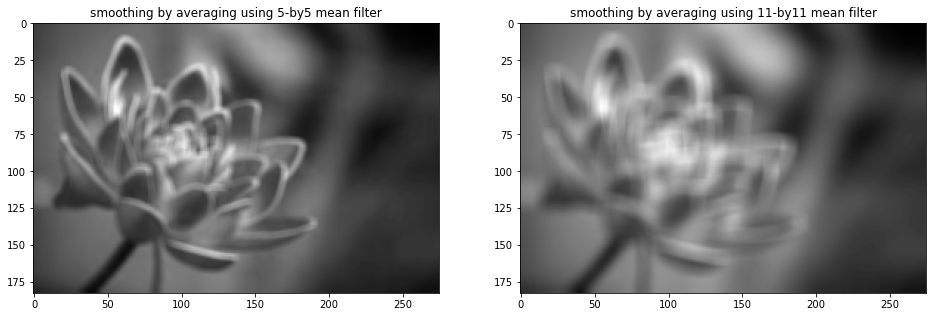

In [32]:
plt.figure(figsize=(16, 16))

plt.subplot(1,2,1),
plt.imshow(I_avg_smooth1,cmap = 'gray')
plt.title('smoothing by averaging using 5-by5 mean filter')

plt.subplot(1,2,2),
plt.imshow(I_avg_smooth2,cmap = 'gray')
plt.title('smoothing by averaging using 11-by11 mean filter')
plt.show()

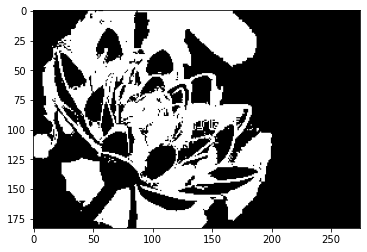

In [33]:
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2,cmap='gray')


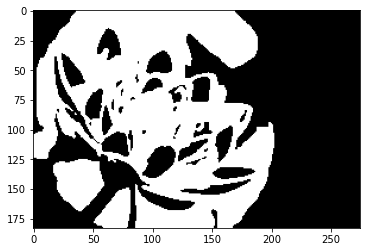

In [34]:
plt.imshow(th3,cmap='gray')

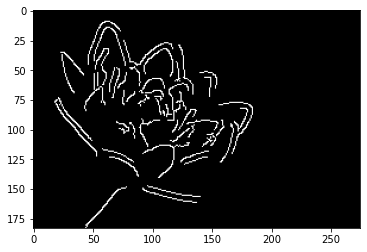

In [35]:
ret4,th4 = cv2.threshold(cannyedges,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th4,cmap='gray')

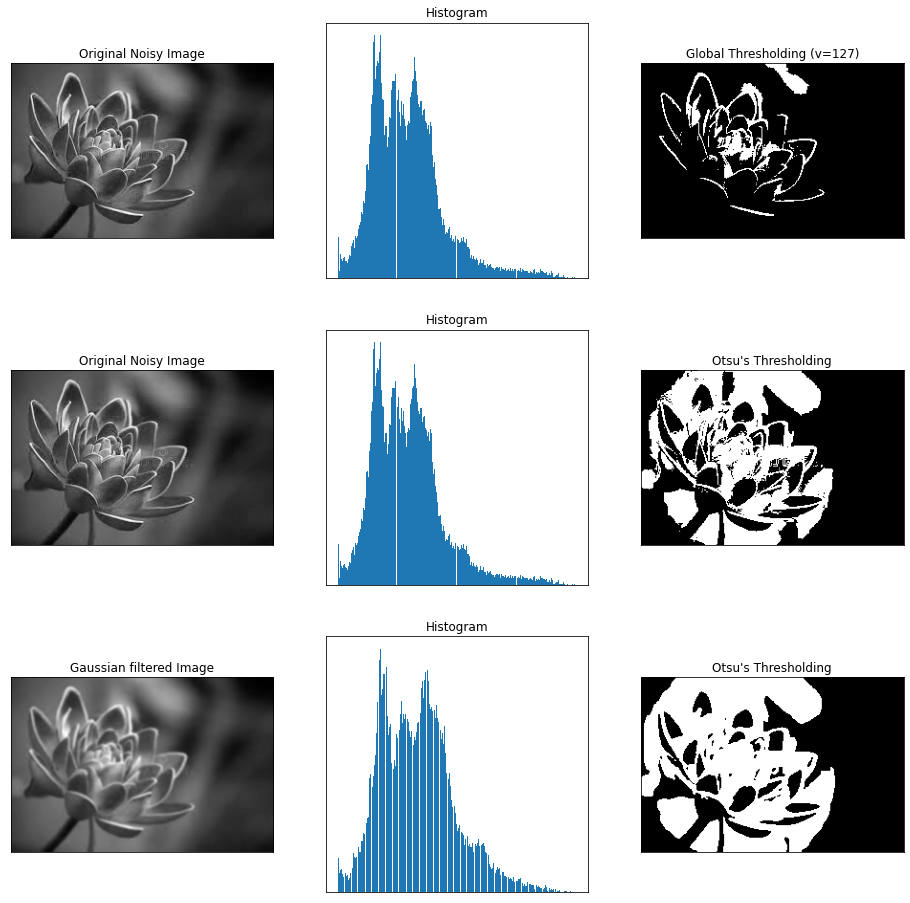

In [36]:
plt.figure(figsize=(16,16))
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

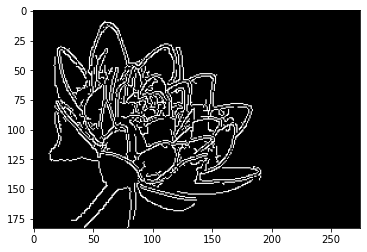

In [37]:
#Hough Line Transform
dst = cv2.Canny(img, 50, 200, None, 3)
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
plt.imshow(cdst)